# Homework (12 pts) - Time Series

## Nisha Dalal nd8288

The following questions refer to the data recording given below in the arrays `time_ms` and `data`.

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np

# data time series recording
data = np.array([ 1.049062  ,  2.7730083 ,  2.4351795 ,  3.5060458 ,  4.2082224 ,
        2.3612652 ,  3.602865  ,  4.071088  ,  3.5066693 ,  2.9041967 ,
        4.398512  ,  3.5848398 ,  2.4235306 ,  2.8119285 ,  2.5310125 ,
        2.015399  ,  4.3619843 ,  3.995742  ,  3.3313735 ,  4.318428  ,
        5.0690393 ,  2.639043  ,  2.4763832 ,  4.226433  ,  4.291953  ,
        3.9499755 ,  4.2620344 ,  4.576327  ,  5.86447   ,  4.96897   ,
        4.2916226 ,  5.242567  ,  4.7626886 ,  3.9652026 ,  4.388119  ,
        3.9571292 ,  4.0237374 ,  3.2218146 ,  5.142596  ,  3.5224905 ,
        4.5745215 ,  4.820327  ,  3.7813215 ,  5.09054   ,  3.803415  ,
        2.6042793 ,  3.8499527 ,  3.8035564 ,  1.9491103 ,  4.1987567 ,
        5.2395625 ,  4.5464096 ,  5.2018404 ,  4.2921853 ,  4.4027567 ,
        3.3455493 ,  4.144482  ,  3.5905666 ,  2.366656  ,  4.3543224 ,
        2.837292  ,  5.2032833 ,  3.3957067 ,  2.0331166 ,  2.9350963 ,
        3.5156536 ,  2.8370478 ,  3.7156415 ,  1.7486537 ,  2.8938727 ,
        3.2668552 ,  3.3252459 ,  1.9336727 ,  1.3159379 ,  2.464878  ,
        3.8639066 ,  2.3398213 ,  2.6286454 ,  3.3673694 ,  2.1993475 ,
        2.6547735 ,  1.613746  ,  2.3605886 ,  2.1611066 ,  2.7039278 ,
        2.5185645 ,  3.164571  ,  2.8442838 ,  1.9872861 ,  1.4923455 ,
        2.4757204 ,  2.0813859 ,  2.5928574 ,  1.0920621 ,  1.4978704 ,
        1.2009721 ,  1.495436  ,  1.4951221 ,  0.67874515,  3.695621  ,
        2.8733506 ,  2.5053136 ,  1.6222339 ,  1.6985819 ,  1.9708593 ,
        2.2194638 ,  2.792327  ,  2.7636347 ,  2.426057  ,  2.4830558 ,
        1.1585052 ,  1.624514  ,  2.012461  ,  2.0958676 ,  2.2919154 ,
        1.7605736 ,  3.2373834 ,  1.591596  ,  1.6916255 ,  3.2600195 ,
        3.2653131 ,  1.3746543 ,  2.6510334 ,  2.2720487 ,  1.1850667 ,
        0.46603376,  2.3568847 ,  1.962046  ,  3.649086  ,  1.9621454 ,
        2.187996  ,  2.191782  ,  1.8450584 ,  2.7452993 ,  1.737613  ,
        1.8317013 ,  2.642354  ,  1.6274115 ,  2.8386092 ,  2.2883074 ,
        0.08097254,  2.6435082 ,  1.9631239 ,  2.1504488 ,  1.9184611 ,
        1.7161876 ,  1.2552108 ,  1.9814202 ,  1.9133097 ,  2.4790146 ,
        2.099219  ,  0.58789206,  1.9277581 ,  2.6949675 ,  1.8535373 ,
        1.6772978 ,  1.3354945 ,  0.44294697,  1.286248  ,  2.3499994 ,
        0.7800249 ,  0.44975606,  1.501128  , -0.19092678,  0.7255814 ,
        0.9947067 ,  1.2209837 ,  1.7898593 ,  1.1456981 ,  1.5517519 ,
        1.3431965 ,  2.6760626 ,  3.1142895 ,  2.3698034 ,  0.52246135,
        1.1693919 ,  2.435941  ,  3.5332355 ,  1.5389941 ,  1.4828812 ,
        1.3422861 ,  1.466446  ,  1.4033954 ,  1.0095776 ,  2.4135673 ,
        2.3562815 ,  1.1859297 ,  0.71282214,  0.83018774,  1.3462011 ,
        0.8144258 ,  1.3524276 ,  1.4233177 ,  0.9205052 ,  1.4235889 ,
        0.52495855, -0.16982777,  0.32543388,  1.2660208 ,  1.3592472 ,
        0.4867606 , -0.33185607,  1.4633859 ,  0.44806853,  0.58185357,
       -2.1856627 , -0.25910145,  0.78456503, -0.4530581 ,  0.08809529,
       -0.0643504 ,  0.03024116,  0.6819324 ,  0.68768865, -0.60301447,
        0.22041649,  1.6282321 , -0.24159762,  0.15499859,  0.4987422 ,
        0.17967756,  0.5551311 ,  0.7805138 ,  2.0745895 , -0.39282316,
       -0.3136878 , -0.34289443, -0.0146801 ,  0.38767108, -0.84448165,
       -0.6668314 , -0.8028177 ,  1.2302247 ,  0.6197551 ,  0.91939676,
        0.79202664,  0.47000152, -0.6403494 , -0.18492322,  0.01758677,
       -1.5498503 ,  0.2599185 , -0.02962169, -1.3445157 , -0.40426883,
        0.23450705, -1.6447628 ,  0.61167514,  1.2353493 , -1.2457248 ,
       -0.3353702 ,  0.36541766,  0.20252183, -0.16956946,  0.2861192 ,
       -1.5037826 ,  0.5125134 ,  1.1689804 , -0.78181225,  1.6275703 ,
       -0.41138184, -1.6932999 ,  1.3431982 , -0.9828467 , -0.6341748 ,
       -0.77457523, -0.18626013, -0.89304817,  0.6205583 , -1.6666737 ,
       -0.23880823, -0.43802115, -0.5845942 , -2.1386027 , -2.9304676 ,
        0.28195837,  0.589406  ,  0.29987574,  0.716519  ,  1.7639219 ,
        3.1102707 ,  2.8203542 ,  0.03608619,  2.3011792 ,  3.1498785 ,
        1.8805636 ,  2.0164208 ,  5.4515586 ,  6.243614  ,  4.315753  ,
        4.2914596 ,  6.34398   ,  3.639256  ,  4.9105864 ,  4.866498  ,
        2.6991675 ,  1.609001  ,  1.3219246 , -0.9454978 , -0.44891477,
       -1.3980628 , -1.7123305 , -3.7898116 , -1.1842121 , -0.36753803,
       -0.8357693 ,  0.60532147,  1.8399553 ,  3.554147  ,  3.1762733 ,
        3.6105082 ,  3.3514533 ,  4.2969646 ,  4.5646257 ,  4.8286543 ,
        5.2188296 ,  3.4536648 ,  6.095162  ,  4.9408274 ,  3.0505595 ,
        4.6457267 ,  4.8518023 ,  3.1466067 ,  2.107268  ,  3.7128031 ,
        4.893902  ,  4.1667094 ,  3.4335303 ,  4.404143  ,  5.503122  ,
        5.9127183 ,  6.772697  ,  6.3577547 ,  5.1416044 ,  5.066385  ,
        4.0782013 ,  4.9009886 ,  5.107134  ,  7.0113254 ,  6.151774  ,
        5.1092753 ,  4.7612085 ,  4.5467124 ,  6.017364  ,  5.0774536 ,
        4.3653746 ,  5.335631  ,  3.3675013 ,  3.4976373 ,  3.8229833 ,
        5.803728  ,  4.0083137 ,  2.6834245 ,  3.505397  ,  3.1457236 ,
        2.023872  ,  4.73052   ,  3.5625534 ,  2.722858  ,  3.5219545 ,
        3.9457588 ,  4.6492357 ,  4.6966715 ,  4.3518066 ,  3.623496  ,
        4.423459  ,  4.7377405 ,  5.127046  ,  6.40082   ,  4.9473166 ,
        4.6484494 ,  6.740527  ,  5.2939415 ,  5.551541  ,  6.4220567 ,
        4.7383137 ,  4.2699013 ,  3.0885293 ,  5.8992357 ,  4.244727  ,
        2.8533764 ,  4.682591  ,  4.6199794 ,  5.5390224 ,  3.8246083 ,
        3.5370765 ,  2.8834379 ,  3.340102  ,  4.0784826 ,  5.2930384 ,
        4.175206  ,  3.4440885 ,  4.468208  ,  5.127364  ,  4.0964026 ,
        4.1827936 ,  4.565499  ,  2.819553  ,  3.3932273 ,  4.1963468 ,
        5.8502173 ,  4.45307   ,  3.4054964 ,  3.0094001 ,  4.385677  ,
        4.0029564 ,  2.946342  ,  3.8554306 ,  2.809301  ,  2.8969967 ,
        3.9026103 ,  3.7821527 ,  2.2925432 ,  4.0702505 ,  4.147656  ,
        4.0681496 ,  2.4844553 ,  1.8468822 ,  3.5333085 ,  3.2759097 ,
        3.4740229 ,  2.279124  ,  3.926496  ,  4.3683586 ,  4.0805373 ,
        3.4867468 ,  5.5121474 ,  5.6505756 ,  4.749034  ,  4.7091994 ,
        4.7124844 ,  5.257303  ,  5.6228495 ,  5.2757607 ,  4.2211704 ,
        4.661426  ,  6.755443  ,  5.889888  ,  4.6643705 ,  5.0781145 ,
        5.107364  ,  3.525258  ,  3.8326576 ,  4.23703   ,  4.3922734 ,
        4.366729  ,  4.3599243 ,  4.9248524 ,  3.8492928 ,  3.7730885 ,
        3.0494177 ,  3.7091873 ,  4.539016  ,  3.364758  ,  2.2980022 ,
        2.4813983 ,  2.4004362 ,  1.7491314 ,  1.0872092 ,  2.7347739 ,
        1.8690407 , -0.3861705 ,  0.6518392 ,  2.3433163 ,  2.2563057 ,
        2.8325553 ,  1.6542947 ,  0.26760867,  1.5222331 ,  2.087839  ,
        1.9348863 ,  2.8291037 ,  2.6386802 ,  1.7069981 ,  2.1252172 ,
        3.4277852 ,  1.6917624 ,  1.1039101 ,  2.0900936 ,  3.102001  ,
        1.2964209 ,  1.2202989 ,  1.1735585 ,  1.995341  ,  2.6809137 ,
        1.6778495 ,  2.556747  ,  2.0199482 ,  2.5414968 ,  2.1667325 ,
        1.7626307 ,  3.8196309 ,  3.2084458 ,  2.850624  ,  4.20006   ,
        3.8362656 ,  3.221026  ,  3.3607996 ,  4.1393256 ,  3.5337448 ,
        2.4528735 ,  3.3809602 ,  3.3681674 ,  3.8167725 ,  3.620832  ,
        4.232816  ,  1.9573542 ,  2.5694337 ,  2.5817664 ,  3.5204618 ,
        2.2947857 ,  1.3827673 ,  3.647538  ,  3.7617514 ,  3.1393518 ,
        3.6462946 ,  2.479536  ,  3.6743999 ,  2.5379505 ,  2.6187758 ,
        1.7588271 ,  1.892364  ,  2.6116052 ,  3.1301372 ,  3.3627467 ,
        1.8851988 ,  2.284896  ,  1.7392843 ,  2.527072  ,  2.1088138 ,
        2.3905926 ,  4.5480986 ,  2.4271295 ,  1.8057842 ,  3.8641067 ,
        3.6721988 ,  1.3088616 ,  1.7901148 ,  4.211671  ,  2.3790338 ,
        3.4593115 ,  2.934927  ,  2.536351  ,  2.5807676 ,  2.5969546 ,
        2.2627907 ,  2.9868    ,  2.6614377 ,  1.8145009 ,  3.68632   ,
        3.1138034 ,  0.79341775,  1.8338706 ,  2.789739  ,  3.4486523 ,
        1.6089362 ,  1.4115831 ,  1.4055763 ,  1.4038098 ,  1.6277373 ,
        2.2915297 ,  2.8331964 ,  2.3545787 ,  0.8015253 ,  1.9462541 ,
        2.0872529 ,  2.859612  ,  1.0035827 ,  0.5205231 ,  2.053372  ,
        3.454046  ,  3.2543006 ,  2.0209858 ,  4.2621813 ,  4.7823524 ,
        3.7397563 ,  4.1224604 ,  2.774172  ,  1.7975868 ,  2.2651083 ,
        1.3761628 ,  1.0699184 ,  1.0317144 ,  1.8715738 ,  1.7627668 ,
        0.7713253 ,  1.0507421 ,  2.824082  ,  2.7352903 ,  1.5616976 ,
        3.9052453 ,  3.5146158 ,  2.177964  ,  3.0820127 ,  2.6156833 ,
        1.6472924 ,  1.5162784 ,  1.7845306 ,  2.4323628 ,  2.113331  ,
        3.3858588 ,  2.4420493 ,  2.4541583 ,  0.77494913,  0.8697895 ,
        2.2253218 ,  2.9384584 ,  2.809019  ,  0.6219252 ,  1.7967283 ,
        2.7137344 ,  1.1468383 ,  1.6697772 ,  1.9298853 ,  2.8960433 ,
        3.0373347 ,  3.0832548 ,  3.8411393 ,  2.0088995 ,  2.5079262 ,
        3.0926363 ,  4.35643   ,  2.928428  ,  3.3212914 ,  3.3753471 ,
        3.0347786 ,  2.787416  ,  0.9872539 ,  2.3568628 ,  2.4793878 ,
        1.7009856 ,  2.5043683 ,  3.5760968 ,  2.6901634 ,  2.4294388 ,
        4.034318  ,  2.3210938 ,  2.917189  ,  3.0067656 ,  3.9018419 ])

# time samples (ms) corresponding to the above data series
time_ms = np.linspace(-1000, 1500, len(data))

1. (3 pts) What are the sample and Nyquist frequencies for this recording in Hz? Pay attention to your units!

In [3]:
interval = (time_ms[1] - time_ms[0]) / 1000

# sample frequency in Hz
s_f = 1 / interval

# Nyquist frequency in Hz
n_f = s_f / 2

print(f"Sample  frequency = {s_f :.2f} Hz")
print(f"Nyquist frequency = {n_f :.2f} Hz")

Sample  frequency = 255.60 Hz
Nyquist frequency = 127.80 Hz


2. (3 pts) Properly downsample to every 10th data point. Plot the original recording overlaid with the downsampled version.

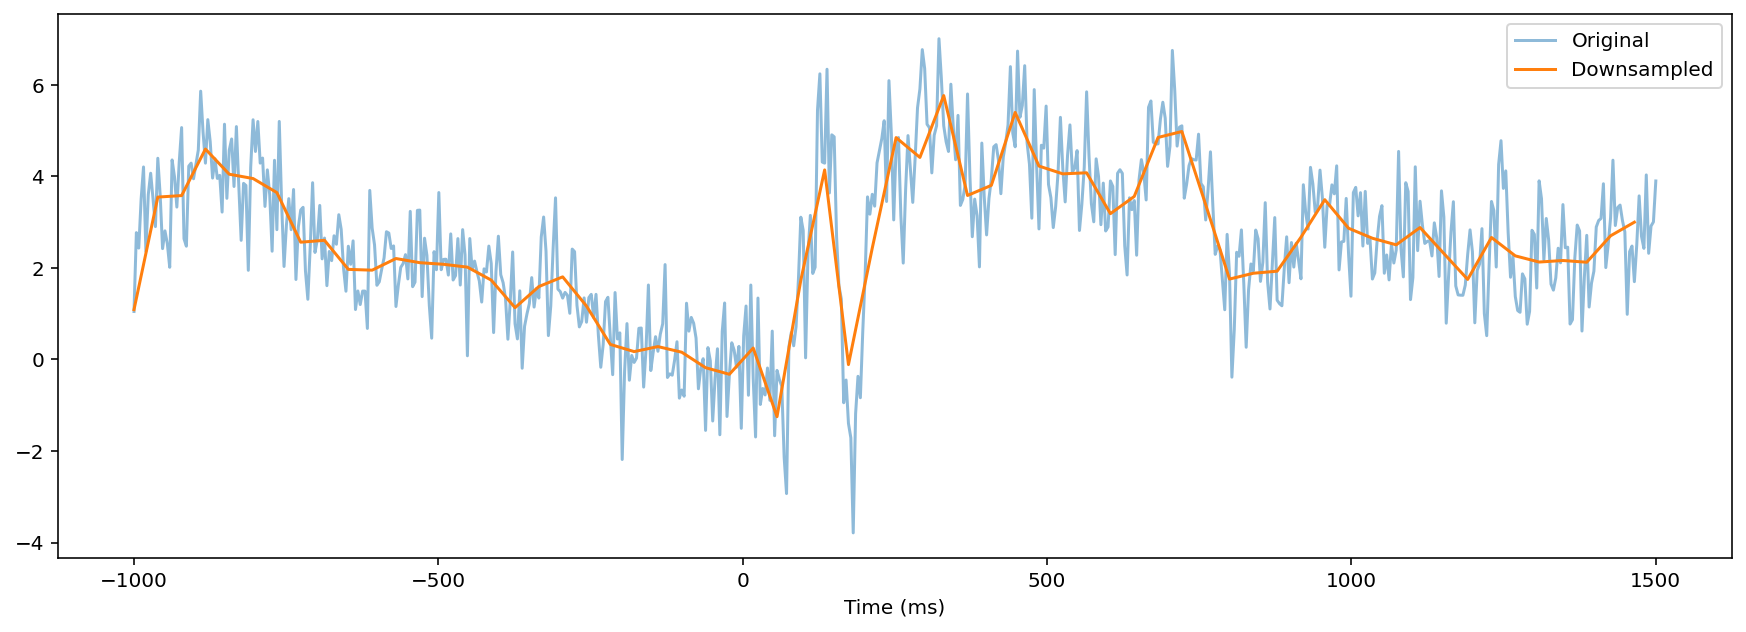

In [4]:
sub_time_ms = time_ms[::10]
sub_data = signal.decimate(data, 10)

plt.figure(figsize=(15,5))
plt.plot(time_ms, data, alpha=0.5, label='Original')
plt.plot(sub_time_ms, sub_data, label='Downsampled')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

3. (3 pts) Bandpass filter the recording from 5-40 Hz. Plot the filter kernel. Also plot the original recording overlaid with the filtered version. Also plot the power spectral density of the original recording overlaid with the power spectral density for the filtered version.

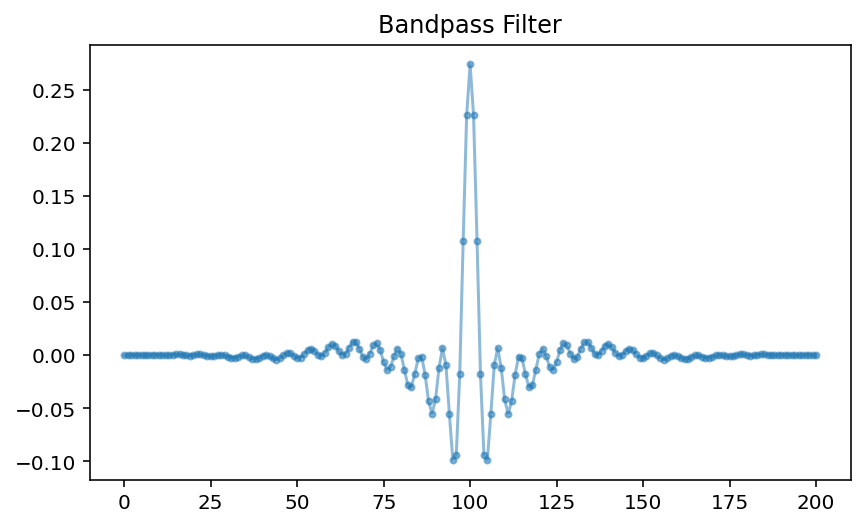

In [12]:
bandpass = signal.firwin(201, [5, 40], pass_zero=False, nyq=n_f)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(bandpass, '.-', alpha=0.5)
plt.title('Bandpass Filter')
plt.show()

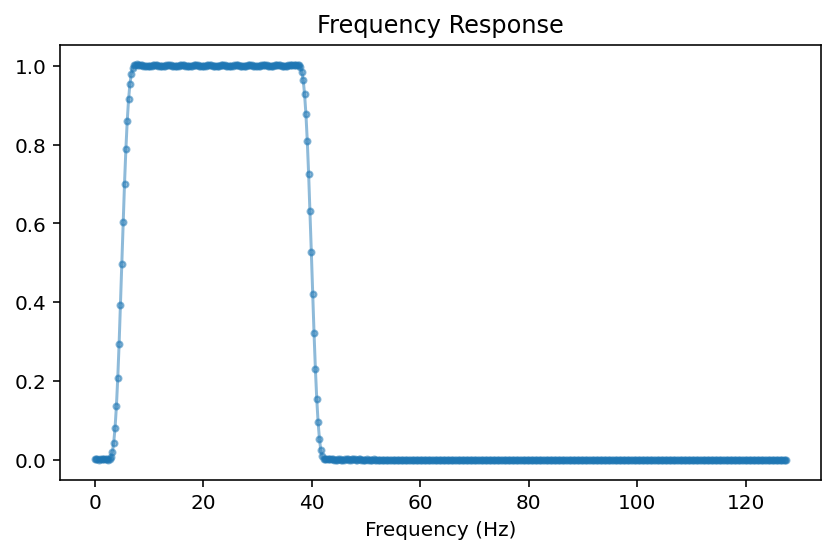

In [13]:
rad, freq_r = signal.freqz(bandpass)
freq_Hz = rad / (2 * np.pi) * s_f

plt.figure(figsize=(15, 4))
plt.subplot(122)
plt.plot(freq_Hz, np.abs(freq_r), '.-', alpha=0.5)
plt.xlabel('Frequency (Hz)')
plt.title('Frequency Response')
plt.show()

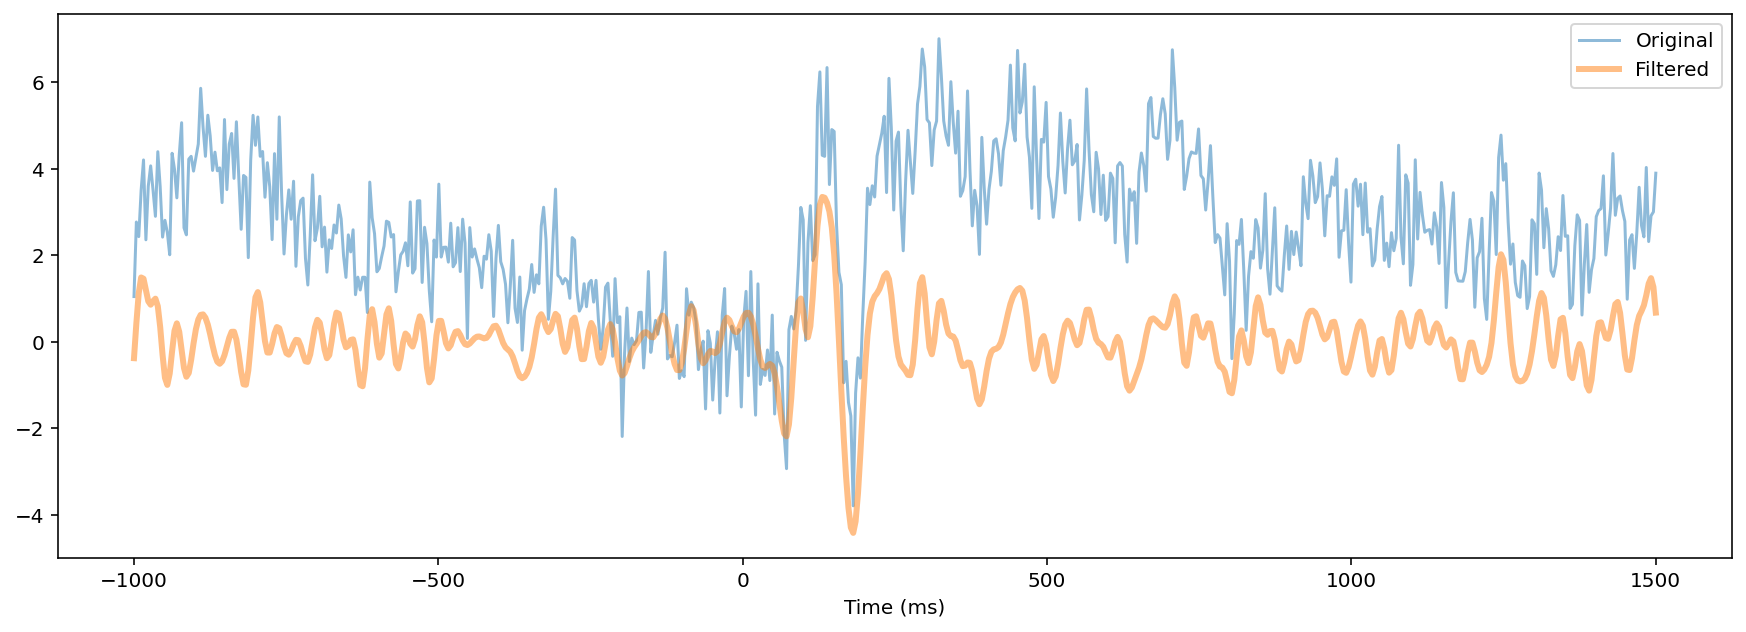

In [15]:
filteredData = np.convolve(data, bandpass, 'same')

plt.figure(figsize=(15,5))
plt.plot(time_ms, data, alpha=0.5, label='Original')
plt.plot(time_ms, filteredData, alpha=0.5, label='Filtered', linewidth=3)
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

4. (3 pts) Plot the fast Fourier transform of the original and filtered data (overlay both on the same plot). Zoom in on the y-axis so that your filtered FFT takes up approximately half the height of the axes.

---
### The following extra credit is for 365P.

### !!!These questions are required for normal (NOT extra) credit for 385L.

**Extra Credit** (3 pts) Plot the power spectral density for the original and filtered data  (overlay both on the same plot).

**Extra Credit** (3 pts) Plot the spectrogram of the filtered data.

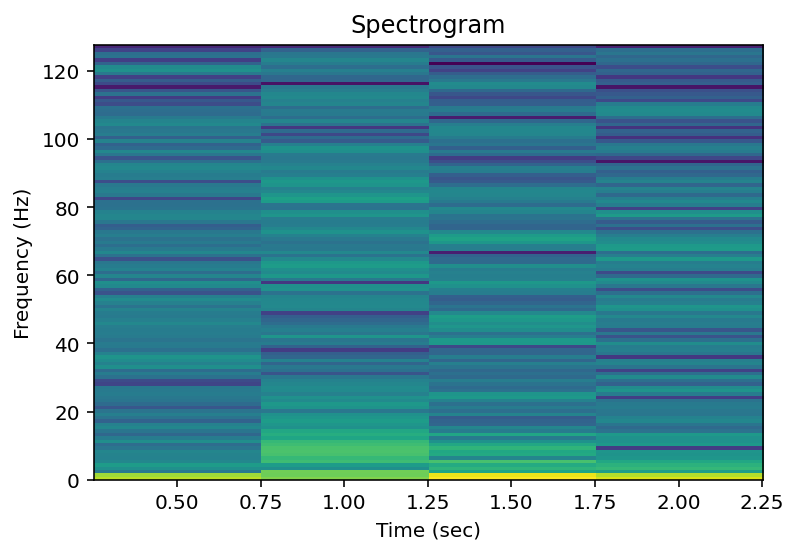

In [20]:
plt.specgram(data, Fs=s_f);
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()